# Importing Libraries

In [2]:
import tensorflow as tf
import os
import shutil
import matplotlib.pyplot as plt

# Creating Custom Dataset

In [3]:
def create_dataset(image_dir):
    # getting the folder name 'train', 'valid' or 'test'
    folder_name = image_dir.split('/')[-1]
    
    # can not use the 'DATASETS' path because kaggle kept it reading only
    # so, used the 'OUTPUT' directory
    output_path = '/kaggle/working/'
    path = os.path.join(output_path, 'custom_ds', folder_name)
    
    # avoiding duplicate path, so if the function called many times it will create the dataset for one time only 
    if not os.path.exists(path):
        print(path)
        os.makedirs(path)
    
    # created the 'class' folders
    class_paths = {
        'non_tumor_path': os.path.join(path, 'non-tumor'),
        'tumor_path': os.path.join(path, 'tumor'),
        'other_path': os.path.join(path, 'other')
    }
    
    for path_name in class_paths:
        if not os.path.exists(class_paths[path_name]):
            os.mkdir(class_paths[path_name])
    
    # looping through all the images in the 'image_dir' 'images' folder
    for filename in os.listdir(os.path.join(image_dir, "images")):
        if filename.endswith('.jpg'):
            img_path = os.path.join(image_dir, "images", filename)
            # 'labels' files are named similar to 'images' file name 
            # so just replaced the extension from '.jpg' to '.txt'
            label_path = os.path.join(image_dir, "labels", filename.replace('.jpg', '.txt'))
            label = None
            
            # 'labels' files first line's first character is the 'class' of that image 
            with open(label_path, 'r') as label_file:
                line = label_file.readline().strip()
                # checking some files might be empty
                if not line:
                    continue
                label = int(line.split()[0])
            
            # checking the label and according to the label classifying the image and
            # copying the image to the appropriate 'class' folder
            if label == 0:
                temp_path = os.path.join(path, 'non-tumor', filename)
                if os.path.exists(temp_path):
                    continue
                shutil.copy2(img_path, temp_path)
            
            elif label == 1:
                temp_path = os.path.join(path, 'tumor', filename)
                if os.path.exists(temp_path):
                    continue
                shutil.copy2(img_path, temp_path)
        
            else:
                temp_path = os.path.join(path, 'other', filename)
                if os.path.exists(temp_path):
                    continue
                shutil.copy2(img_path, temp_path)

In [4]:
train_data_dir = "/kaggle/input/medical-image-dataset-brain-tumor-detection/Brain Tumor Detection/train"
test_data_dir = '/kaggle/input/medical-image-dataset-brain-tumor-detection/Brain Tumor Detection/test'
valid_data_dir = '/kaggle/input/medical-image-dataset-brain-tumor-detection/Brain Tumor Detection/valid'

In [5]:
create_dataset(train_data_dir)
create_dataset(valid_data_dir)
create_dataset(test_data_dir)

/kaggle/working/custom_ds/train
/kaggle/working/custom_ds/valid
/kaggle/working/custom_ds/test


In [6]:
custom_train_data_dir = '/kaggle/working/custom_ds/train'
custom_valid_data_dir = '/kaggle/working/custom_ds/valid'
custom_test_data_dir = '/kaggle/working/custom_ds/test'

In [7]:
batch_size = 32
seed = 123
image_size = (224, 224)

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  custom_train_data_dir,
  seed=seed,
  image_size=image_size,
  batch_size=batch_size)

Found 6851 files belonging to 3 classes.


In [9]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  custom_valid_data_dir,
  seed=seed,
  image_size=image_size,
  batch_size=batch_size)

Found 1963 files belonging to 3 classes.


In [10]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  custom_test_data_dir,
  seed=seed,
  image_size=image_size,
  batch_size=batch_size)

Found 973 files belonging to 3 classes.


In [11]:
print(train_ds.class_names)
print(valid_ds.class_names)
print(test_ds.class_names)

['non-tumor', 'other', 'tumor']
['non-tumor', 'other', 'tumor']
['non-tumor', 'other', 'tumor']


# Visualizing the Data

In [12]:
class_names = train_ds.class_names

In [13]:
len(class_names)

3

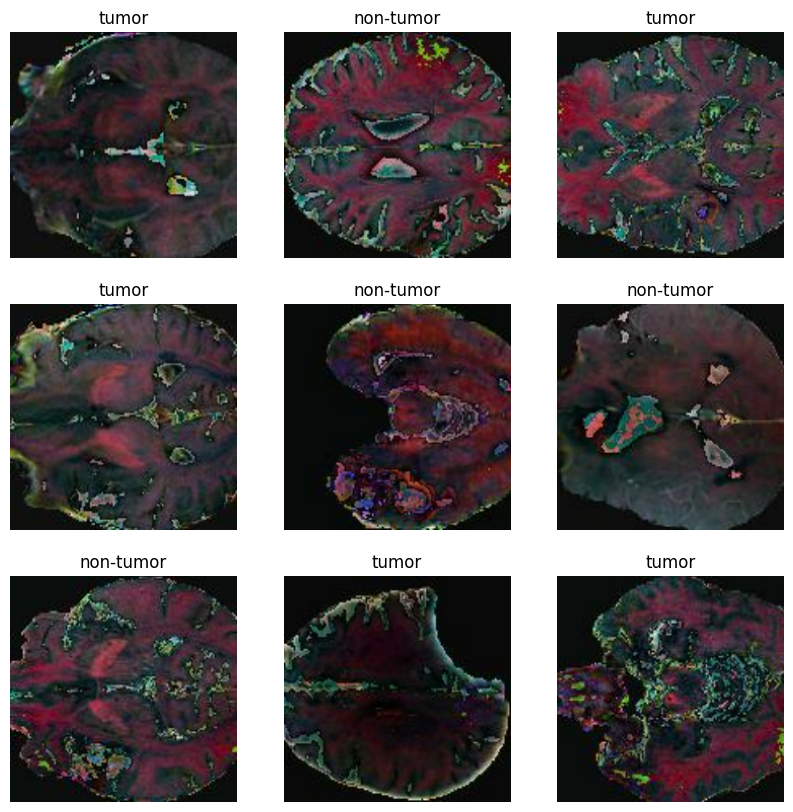

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
images, labels = next(iter(train_ds))

In [16]:
images.shape

TensorShape([32, 224, 224, 3])

In [64]:
labels.shape

TensorShape([32])

In [87]:
# import numpy as np
# assert not np.any(np.isnan(labels))

AssertionError: 

In [65]:
labels

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 2], dtype=int32)>

In [17]:
# RGB image pixel values are from 0 to 255
image = images[0]
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        ...,
        [10.      , 14.      , 13.      ],
        [11.138397, 14.      , 13.      ],
        [12.      , 14.      , 13.      ]],

       [[13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        ...,
        [10.      , 14.      , 13.      ],
        [11.138397, 14.      , 13.      ],
        [12.      , 14.      , 13.      ]],

       [[13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        ...,
        [10.      , 14.      , 13.      ],
        [11.138397, 14.      , 13.      ],
        [12.      , 14.      , 13.      ]],

       ...,

       [[13.      , 13.      , 13.      ],
        [13.      , 13.      , 13.      ],
        [13.      , 13.    

# Standardize the Data

In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

We can use this "Rescaling" layer by using "Dataset.map" to our whole dataset or we can use this layer inside of our model. <br>
For this model, I will use the second approach.

In [19]:
# image pixel values are now from 0 to 1
normalization_layer(image)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        ...,
        [0.03921569, 0.05490196, 0.0509804 ],
        [0.04367999, 0.05490196, 0.0509804 ],
        [0.04705883, 0.05490196, 0.0509804 ]],

       [[0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        ...,
        [0.03921569, 0.05490196, 0.0509804 ],
        [0.04367999, 0.05490196, 0.0509804 ],
        [0.04705883, 0.05490196, 0.0509804 ]],

       [[0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        [0.0509804 , 0.0509804 , 0.0509804 ],
        ...,
        [0.03921569, 0.05490196, 0.0509804 ],
        [0.04367999, 0.05490196, 0.0509804 ],
        [0.04705883, 0.05490196, 0.0509804 ]],

       ...,

       [[0.0509804 , 0.0509804 , 0.0509804 ],
        [0.05

In [20]:
# train_ds_normalized = train_ds.map(lambda x, y: (normalization_layer(x), y))

In [21]:
# image_batch, labels_batch = next(iter(train_ds_normalized))
# first_image = image_batch[0]

In [22]:
# pixel values are now from 0 to 1
# first_image

In [23]:
# valid_ds_normalized = valid_ds.map(lambda x, y: (normalization_layer(x), y))
# test_ds_normalized = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Configuring the Data Performance

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

In [25]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Transfer Learning

In [95]:
image_shape = image_size + (3,)
image_shape

(224, 224, 3)

In [96]:
base_model = tf.keras.applications.ResNet50(input_shape=image_shape,
                                           include_top=False)

In [97]:
len(base_model.layers)

175

In [98]:
images.shape

TensorShape([32, 224, 224, 3])

In [99]:
base_model_sample = base_model(images)
base_model_sample.shape

TensorShape([32, 7, 7, 2048])

In [100]:
base_model.trainable = False

In [101]:
inputs = tf.keras.Input(shape=image_shape)
x = tf.keras.layers.Rescaling(1./127.5)(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax')(x)
resnet50_model = tf.keras.Model(inputs, outputs) 

In [102]:
resnet50_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                           

In [103]:
len(resnet50_model.trainable_variables)

2

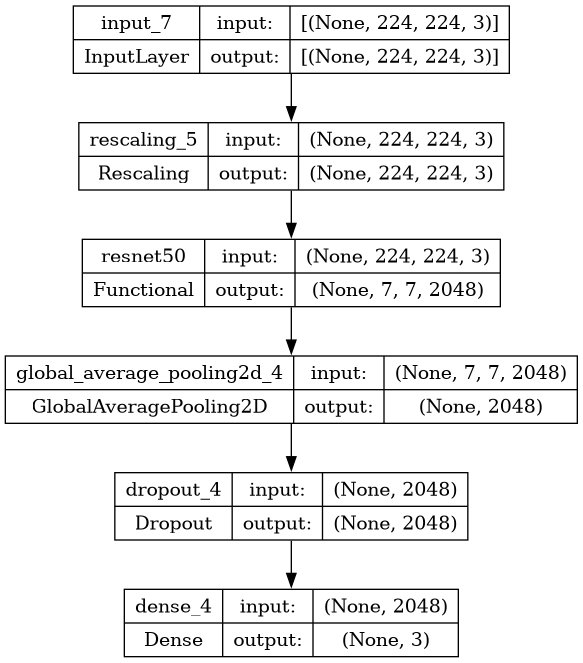

In [104]:
tf.keras.utils.plot_model(resnet50_model, show_shapes=True)

In [105]:
resnet50_model_sample = resnet50_model(images)
resnet50_model_sample.shape

TensorShape([32, 3])

In [106]:
learning_rate = 0.1 
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

In [107]:
inital_epochs = 10       # typo inital_epochs it would be initial_epochs
history = resnet50_model.fit(train_ds,
                            epochs=inital_epochs,
                            validation_data=valid_ds)

Epoch 1/10
215/215 [==============================] - 31s 130ms/step - loss: 2.4195 - accuracy: 0.5611 - val_loss: 4.6072 - val_accuracy: 0.3617
Epoch 2/10
215/215 [==============================] - 27s 124ms/step - loss: 2.2083 - accuracy: 0.5677 - val_loss: 4.7563 - val_accuracy: 0.3622
Epoch 3/10
215/215 [==============================] - 26s 122ms/step - loss: 1.8974 - accuracy: 0.5963 - val_loss: 3.7934 - val_accuracy: 0.3663
Epoch 4/10
215/215 [==============================] - 26s 123ms/step - loss: 1.7450 - accuracy: 0.5875 - val_loss: 1.8790 - val_accuracy: 0.4233
Epoch 5/10
215/215 [==============================] - 26s 123ms/step - loss: 1.4123 - accuracy: 0.5929 - val_loss: 4.8351 - val_accuracy: 0.3642
Epoch 6/10
215/215 [==============================] - 26s 123ms/step - loss: 1.6439 - accuracy: 0.5983 - val_loss: 6.9820 - val_accuracy: 0.3627
Epoch 7/10
215/215 [==============================] - 26s 122ms/step - loss: 2.2988 - accuracy: 0.6006 - val_loss: 2.6872 - val_ac

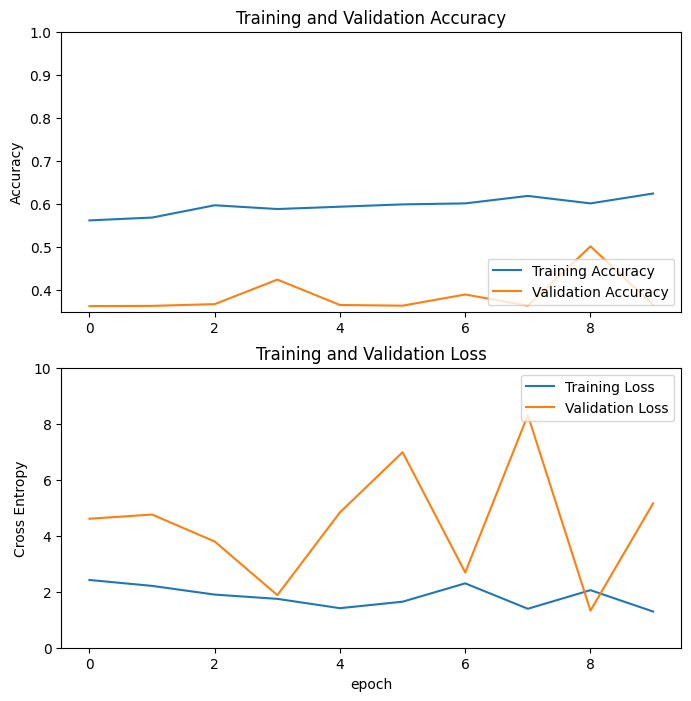

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,10.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Fine Tuning

In [109]:
base_model.trainable = True
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [114]:
learning_rate = 0.1
resnet50_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      metrics=['accuracy'])

In [115]:
resnet50_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                           

In [116]:
len(resnet50_model.trainable_variables)

92

In [ ]:
fine_tune_epochs = 10
total_epochs =  inital_epochs + fine_tune_epochs # typo inital_epochs it would be initial_epochs

history_fine = resnet50_model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=valid_ds)

Epoch 10/20
215/215 [==============================] - 51s 199ms/step - loss: 0.6827 - accuracy: 0.6186 - val_loss: 0.6789 - val_accuracy: 0.6347
Epoch 11/20
215/215 [==============================] - 41s 192ms/step - loss: 0.6826 - accuracy: 0.6186 - val_loss: 0.6788 - val_accuracy: 0.6347
Epoch 12/20
215/215 [==============================] - 41s 192ms/step - loss: 0.6825 - accuracy: 0.6186 - val_loss: 0.6787 - val_accuracy: 0.6347
Epoch 13/20
 12/215 [>.............................] - ETA: 33s - loss: 0.6716 - accuracy: 0.6406